#  Naira Marley Face Detector 

In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import cv2
import face_recognition
import matplotlib.pyplot as plt
import os
%matplotlib inline

### A helper function to view images

In [2]:
def plot_images(images, gray=False,number_of_images=3):

    fig, axes = plt.subplots(nrows=1, ncols=number_of_images, figsize=(30,20))
    i=0
    
    for y in range(number_of_images):
        if gray:
            axes[y].imshow(images[i], cmap='gray')
        else:
            axes[y].imshow(images[i])
        i+=1
    
    plt.show()

### convert jpg files into numpy arrays

In [3]:
naira_marley_train = face_recognition.load_image_file("pics/naira_marley_resized1.jpg")

naira_marley_test = face_recognition.load_image_file("pics/naira_marley_resized3.jpg")

drake = face_recognition.load_image_file("pics/drake_resized.jpg")

### visualise images

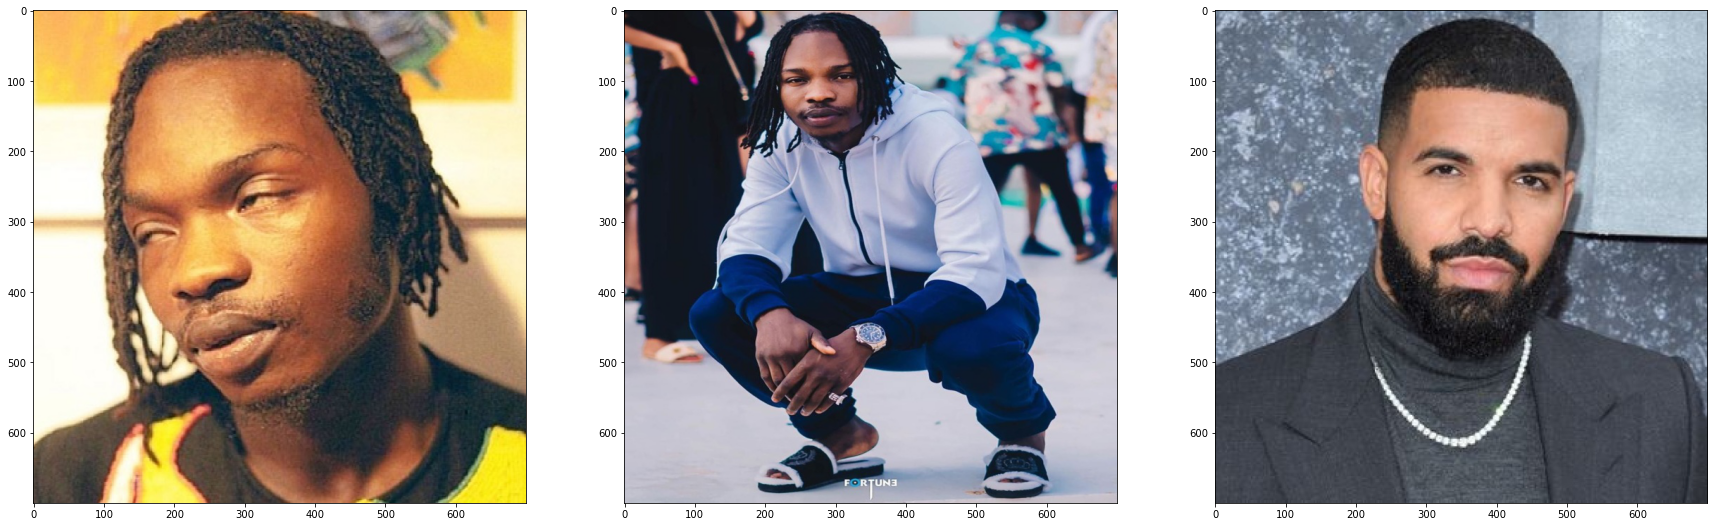

In [4]:
plot_images([naira_marley_train, naira_marley_test, drake])

### find face encodings in training image

In [5]:
face_encodings_train= face_recognition.face_encodings(naira_marley_train)[0]
known_face_encodings = [face_encodings_train]
known_face_names = ["Naira Marley"]


### helper function that performs face identification and draws bounding boxes of identified faces

In [6]:
def face_detection(img):
    face_locations = face_recognition.face_locations(img)
    print (face_locations)
    face_encodings = face_recognition.face_encodings(img, face_locations)
    #convert image to PIL-format image so we can draw on it
    pil_image = Image.fromarray(img)
    draw = ImageDraw.Draw(pil_image)    
    font = ImageFont.truetype(os.path.join(os.getcwd(), "arial.ttf"), 30)
    
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name  = "unknown"
        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            print(name)
        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255), width=10)

        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(name)
        draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255), font=font)
      
    
    #remove drawing library from memory as per Pillow docs
    del draw
    return pil_image
 
    
    

In [7]:
img = face_detection(naira_marley_test)
img1  = face_detection(drake)

[(53, 339, 182, 210)]
Naira Marley
[(171, 527, 439, 260)]


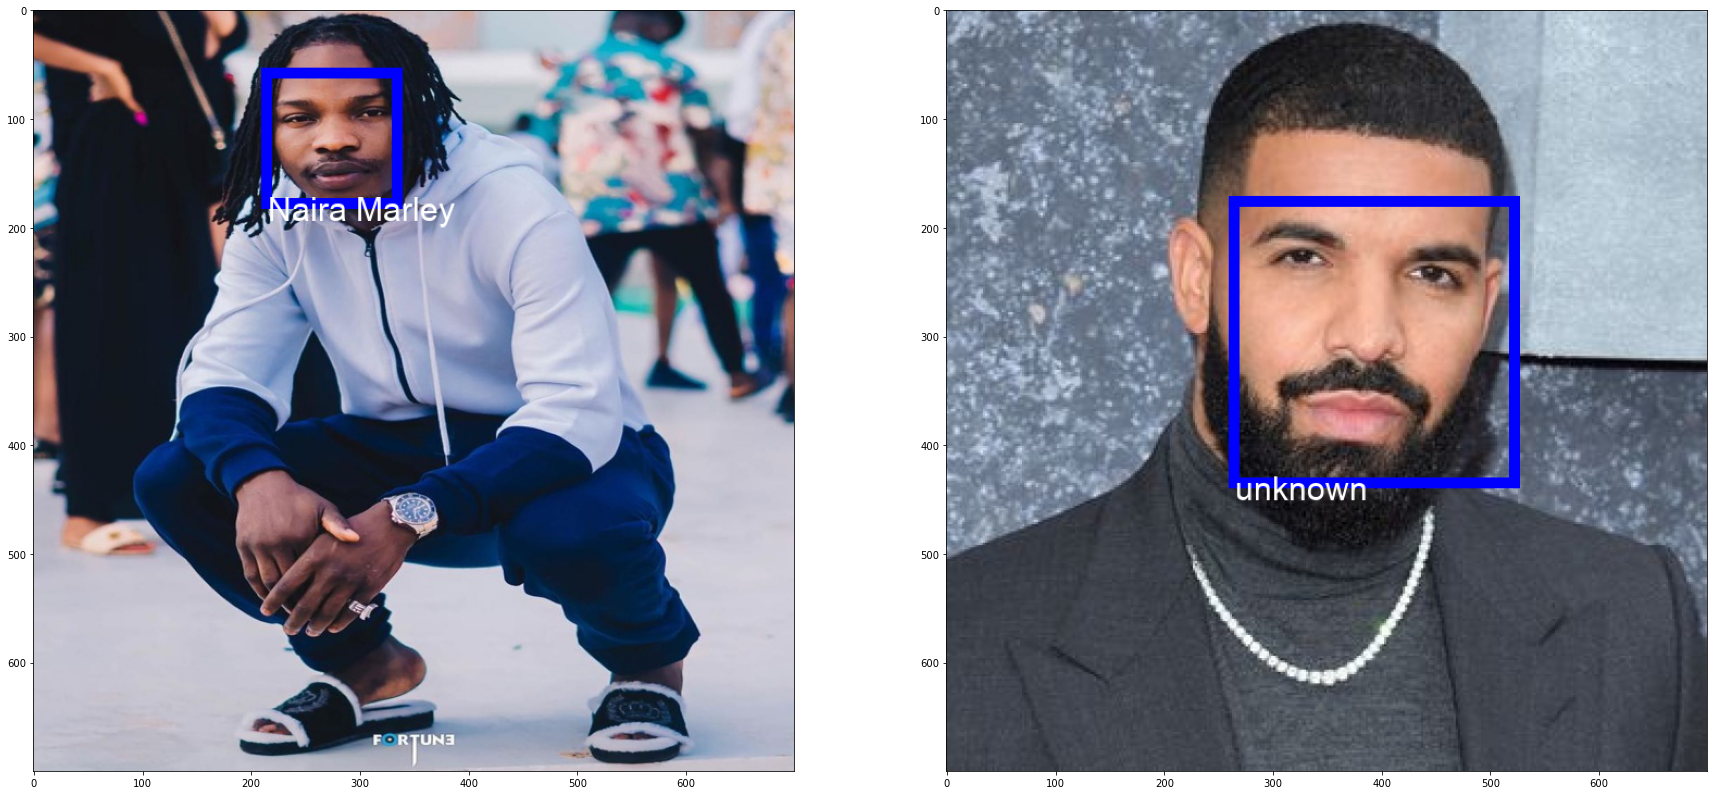

In [8]:
plot_images([img, img1], number_of_images=2)